In [17]:
import pandas as pd
df=pd.read_csv ("D:/one drive UA/OneDrive - Universitas Airlangga/SEMESTER 6/SISTEM CERDAS/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [18]:
import glob
import os
base_dir = "D:/one drive UA/OneDrive - Universitas Airlangga/SEMESTER 6/SISTEM CERDAS/Skin Cancer"
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob.glob(os.path.join(base_dir, '*.jpg'))}
# imageid_path_dict

In [19]:
df['path']=df.image_id.map(imageid_path_dict.get)
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:/one drive UA/OneDrive - Universitas Airlang...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:/one drive UA/OneDrive - Universitas Airlang...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:/one drive UA/OneDrive - Universitas Airlang...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:/one drive UA/OneDrive - Universitas Airlang...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:/one drive UA/OneDrive - Universitas Airlang...


In [20]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [21]:
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [22]:
class_cancer = {
    'akiec' : 'Actinic keratoses',
    'bcc' : 'Basal cell carcinoma',
    'bkl' : 'Benign keratosis',
    'df' : 'dermatofibroma',
    'mel' : 'melanoma',
    'nv' : 'melanocytic nevi',
    'vasc' : 'vascular lesions'
}
sex_dict = {
    'male' : 1,
    'female' : 0
}
location_dict ={
    'back' : 0,'lower extremity' : 1, 'trunk':2,'upper extremity':3,'abdomen':4,'face':5,
    'chest':6,'foot':7,'unknown':8,'neck':9,'scalp':10,'hand':11,'ear':12,'genital':13,'acral':14    
}
df['sex']=df['sex'].map(sex_dict)
df['localization']=df['localization'].map(location_dict)
df['lesion']=df.dx.map(class_cancer)
df['lesion_idx']=pd.Categorical(df['lesion']).codes
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,lesion,lesion_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,1.0,10,D:/one drive UA/OneDrive - Universitas Airlang...,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,1.0,10,D:/one drive UA/OneDrive - Universitas Airlang...,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,1.0,10,D:/one drive UA/OneDrive - Universitas Airlang...,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,1.0,10,D:/one drive UA/OneDrive - Universitas Airlang...,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,1.0,12,D:/one drive UA/OneDrive - Universitas Airlang...,Benign keratosis,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           9958 non-null   float64
 6   localization  10015 non-null  int64  
 7   path          10015 non-null  object 
 8   lesion        10015 non-null  object 
 9   lesion_idx    10015 non-null  int8   
dtypes: float64(2), int64(1), int8(1), object(6)
memory usage: 714.1+ KB


In [24]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex             57
localization     0
path             0
lesion           0
lesion_idx       0
dtype: int64

In [25]:
df['age'].fillna((df['age'].mean()), inplace=True)
df['sex'].fillna((df['sex'].mean()), inplace=True)

In [26]:
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
lesion          0
lesion_idx      0
dtype: int64

In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# ax = sns.countplot(x = 'sex', data = df)
# plt.title('Gender wise distribution')
# plt.xticks(rotation=45)
# plt.show()

In [28]:
df['lesion_idx'].value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: lesion_idx, dtype: int64

<AxesSubplot:>

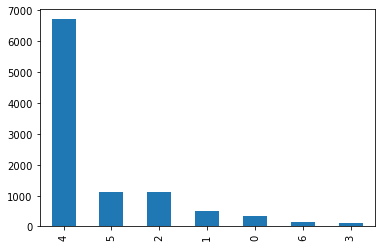

In [29]:
df['lesion_idx'].value_counts().plot.bar()

In [30]:
import cv2

In [31]:
# Function to read and resize images
def read_and_resize_image(image_path, size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    return img

In [32]:
image_size = (64, 64)

In [33]:
# # Apply the function to each image path in the 'path' column of the dataframe
df['image'] = df['path'].apply(lambda x: read_and_resize_image(x, image_size))
# df['image'] = df['path'].apply(read_image)


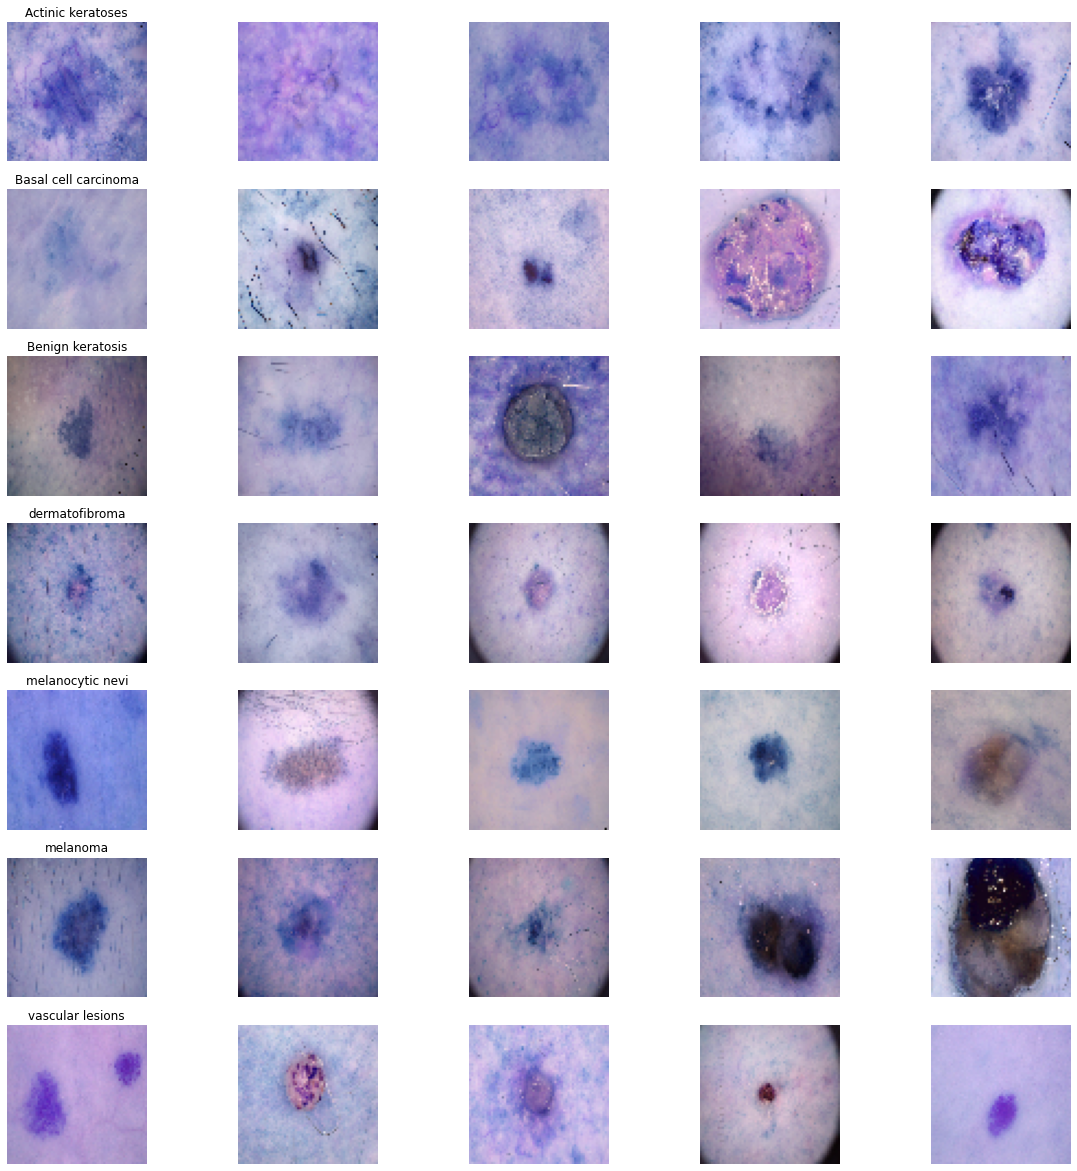

In [34]:
import matplotlib.pyplot as plt

n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['lesion']).groupby('lesion')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
plt.savefig('category_samples.png', dpi=300)


In [35]:
df['image'].map(lambda x: x.shape).value_counts()

(64, 64, 3)    10015
Name: image, dtype: int64

In [36]:
import numpy as np
X = df['image']
y = df['lesion_idx']

In [37]:
from imblearn.over_sampling import SMOTE
# Convert X and y to NumPy arrays if they are not already
X = np.stack(X.values)
y = y.values

# Verify the shape and type of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X data type:", X.dtype)
print("y data type:", y.dtype)

# Check the unique values in y to verify if it is categorical
print("Unique values in y:", np.unique(y))

# Reshape X to a 2D array
X_2d = X.reshape(X.shape[0], -1)

# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_2d, y)

# Reshape the resampled X back to the original shape
X_resampled = X_resampled.reshape(len(X_resampled), X.shape[1], X.shape[2], X.shape[3])

# Verify the shape of the resampled data
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X shape: (10015, 64, 64, 3)
y shape: (10015,)
X data type: uint8
y data type: int8
Unique values in y: [0 1 2 3 4 5 6]
X_resampled shape: (46935, 64, 64, 3)
y_resampled shape: (46935,)


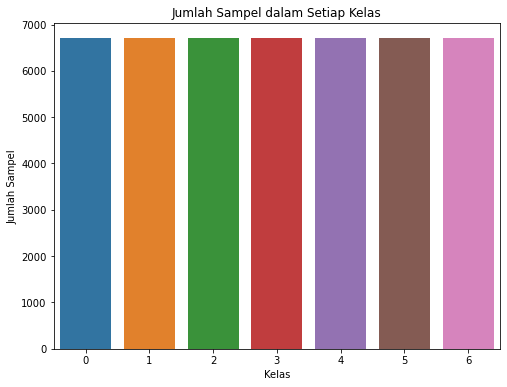

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah kelas dalam array target yang diresampling
class_counts = pd.Series(y_resampled).value_counts()

# Plot bar chart untuk menampilkan jumlah sampel dalam setiap kelas
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Jumlah Sampel dalam Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

In [39]:
from keras.utils import to_categorical
y = to_categorical(y_resampled)
X = X_resampled

In [40]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37548, 64, 64, 3) (9387, 64, 64, 3) (37548, 7) (9387, 7)


In [41]:
# # Extract the image data and target labels for train and test sets
# from keras.utils import to_categorical
# import numpy as np
# X_train = np.stack(train_df['image'].values)
# y_train = train_df['lesion_idx'].values
# y_train_categorical = to_categorical (y_train, num_classes =7)
# X_test = np.stack(test_df['image'].values)
# y_test = test_df['lesion_idx'].values
# y_test_categorical = to_categorical (y_test, num_classes =7)
# print('X_train shape', X_train.shape)
# print(' X_test shape', X_test.shape)
# print(' y_train_categorical', y_train_categorical.shape)
# print('y_test_categorical shape', y_test_categorical.shape)

In [42]:
from sklearn.utils.class_weight import compute_class_weight

def est_class_weights(dis_id: np.array) -> dict:
    class_indices = np.unique(dis_id)
    class_mapping = {class_label: i for i, class_label in enumerate(class_indices)}
    mapped_dis_id = np.array([class_mapping[class_label] for class_label in dis_id])
    
    class_weights = np.around(compute_class_weight(class_weight='balanced', classes=np.unique(mapped_dis_id), y=mapped_dis_id), 2)
    class_weights = dict(zip(np.unique(mapped_dis_id), class_weights))
    return class_weights

y_id = np.array(df['lesion_id'])
new_class_weights = est_class_weights(y_id)
# print(new_class_weights)


In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout


model = Sequential()
        

model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))


model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="same"))
model.add(BatchNormalization())


model.add(Conv2D(filters = 384,
                kernel_size = (1, 1), 
                strides = (1, 1), 
                activation = 'relu', 
                padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, 
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
              
model.add(Flatten()) 

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              
model.add(Dense(7, activation = 'softmax'))

In [44]:
def mod_checkpoint_callback():
    
    trained_model = ModelCheckpoint(filepath = 'model.h5',  
                             save_weights_only = False,     
                             monitor = 'val_accuracy',      
                             mode = 'auto',                 
                             save_best_only = True,     
                             verbose = 1)
    return trained_model

In [45]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

early_stopping_monitor = EarlyStopping(patience = 35, monitor = 'val_accuracy')

model_checkpoint_callback = mod_checkpoint_callback()


optimizer = Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.3, horizontal_flip = True, shear_range = 0.3)
datagen.fit(X_train)

batch_size = 32
epochs = 48
history = model.fit(datagen.flow(X_train,y_train),
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [early_stopping_monitor, model_checkpoint_callback],
                    validation_data = (X_test, y_test),
                    class_weight = new_class_weights
                )

Epoch 1/48
1174/1174 [==============================] - ETA: 0s - loss: 1.2119 - accuracy: 0.3146
Epoch 1: val_accuracy improved from -inf to 0.24566, saving model to model.h5
1174/1174 [==============================] - 352s 298ms/step - loss: 1.2119 - accuracy: 0.3146 - val_loss: 3.3679 - val_accuracy: 0.2457
Epoch 2/48
1174/1174 [==============================] - ETA: 0s - loss: 1.0427 - accuracy: 0.4034
Epoch 2: val_accuracy improved from 0.24566 to 0.26942, saving model to model.h5
1174/1174 [==============================] - 347s 296ms/step - loss: 1.0427 - accuracy: 0.4034 - val_loss: 1.9737 - val_accuracy: 0.2694
Epoch 3/48
1174/1174 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.4494
Epoch 3: val_accuracy improved from 0.26942 to 0.44519, saving model to model.h5
1174/1174 [==============================] - 340s 290ms/step - loss: 0.9608 - accuracy: 0.4494 - val_loss: 1.4345 - val_accuracy: 0.4452
Epoch 4/48
1174/1174 [==============================] -

1174/1174 [==============================] - ETA: 0s - loss: 0.3637 - accuracy: 0.7670
Epoch 28: val_accuracy improved from 0.73122 to 0.73783, saving model to model.h5
1174/1174 [==============================] - 487s 415ms/step - loss: 0.3637 - accuracy: 0.7670 - val_loss: 0.6884 - val_accuracy: 0.7378
Epoch 29/48
1174/1174 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.7737
Epoch 29: val_accuracy improved from 0.73783 to 0.73804, saving model to model.h5
1174/1174 [==============================] - 485s 413ms/step - loss: 0.3528 - accuracy: 0.7737 - val_loss: 0.6952 - val_accuracy: 0.7380
Epoch 30/48
1174/1174 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.7766
Epoch 30: val_accuracy did not improve from 0.73804
1174/1174 [==============================] - 486s 414ms/step - loss: 0.3456 - accuracy: 0.7766 - val_loss: 0.7357 - val_accuracy: 0.7292
Epoch 31/48
1174/1174 [==============================] - ETA: 0s - loss: 0.3381 - accura

In [46]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

294/294 [==============================] - 7s 24ms/step - loss: 1.0801 - accuracy: 0.6971
Accuracy: 69.71%


In [47]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

classification_rep = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(classification_rep)


294/294 [==============================] - 7s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1295
           1       0.61      0.74      0.67      1323
           2       0.53      0.49      0.51      1351
           3       0.76      0.95      0.85      1392
           4       0.97      0.46      0.62      1346
           5       0.67      0.49      0.57      1312
           6       0.75      0.93      0.83      1368

    accuracy                           0.70      9387
   macro avg       0.71      0.70      0.68      9387
weighted avg       0.71      0.70      0.69      9387



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm

array([[1042,  126,   48,   61,    0,   11,    7],
       [ 108,  982,   36,   68,    0,   15,  114],
       [ 182,  239,  667,   67,    1,  126,   69],
       [  19,   28,    4, 1318,    0,    9,   14],
       [   7,   28,  283,  134,  618,  149,  127],
       [ 142,  153,  216,   50,   17,  641,   93],
       [   8,   48,    4,   29,    0,    3, 1276]], dtype=int64)

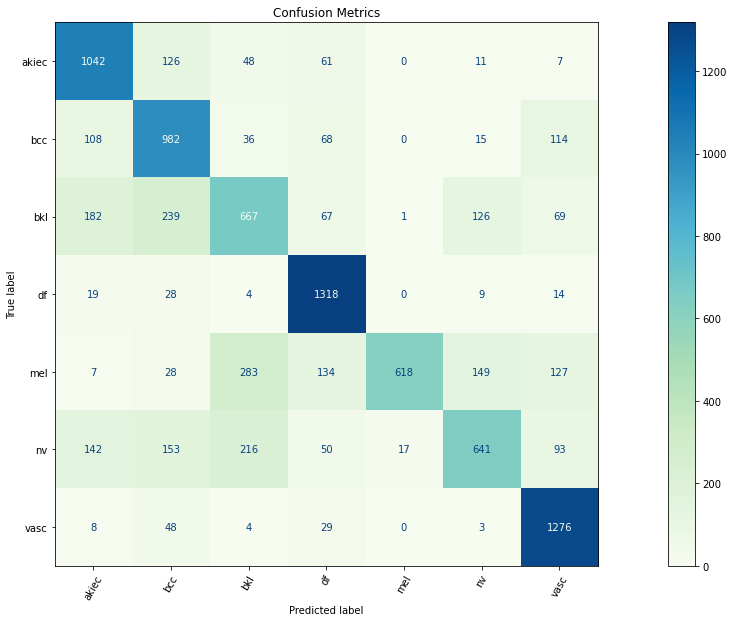

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

display_c_m = ConfusionMatrixDisplay(cm, display_labels=class_cancer )
fig, ax = plt.subplots(figsize=(25,10)) 
display_c_m.plot(cmap='GnBu',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()